# Body Fat Estimator

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Import Data

In [86]:
df_raw=pd.read_csv('bodyfat.csv')
df_raw.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [87]:
df=df_raw.copy()

In [88]:
df.shape

(252, 15)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


## Data Processing

In [91]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

Density    0.0
BodyFat    0.0
Age        0.0
Weight     0.0
Height     0.0
Neck       0.0
Chest      0.0
Abdomen    0.0
Hip        0.0
Thigh      0.0
Knee       0.0
Ankle      0.0
Biceps     0.0
Forearm    0.0
Wrist      0.0
dtype: float64

### T-Test

In [92]:
df=df[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BodyFat']]

In [93]:
columns=df.columns

In [94]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'BodyFat']

In [95]:
from scipy.stats import ttest_ind

In [96]:
list_of_numeric_columns=numeric[:-1]

In [97]:
def perform_t_test(data_frame, list_of_column, Target_column):
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Numerical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        t_statistic, p_value = ttest_ind(df[col], df[Target_column])
        pvalNum.append(p_value)
    
    dict={'P-Value of the T-Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the T-Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    
    return PvalueTable

In [98]:
perform_t_test(df,list_of_numeric_columns,'BodyFat')

,P-Value of the T-Test,Decision
Density,8.738299e-134,Reject Null Hypothesis
Age,7.322134e-100,Reject Null Hypothesis
Weight,2.477774e-295,Reject Null Hypothesis
Height,1.059373e-308,Reject Null Hypothesis
Neck,9.044898e-134,Reject Null Hypothesis
Chest,0.000000e+00,Reject Null Hypothesis
Abdomen,4.620200e-301,Reject Null Hypothesis
Hip,0.000000e+00,Reject Null Hypothesis
Thigh,1.198045e-245,Reject Null Hypothesis
Knee,1.080142e-138,Reject Null Hypothesis


### Multicollinearity Check

***One should always be concerned about the collinearity, regardless of the model/method being linear or not, or the main task being prediction or classification***

#### Pearson Correlation

<AxesSubplot:>

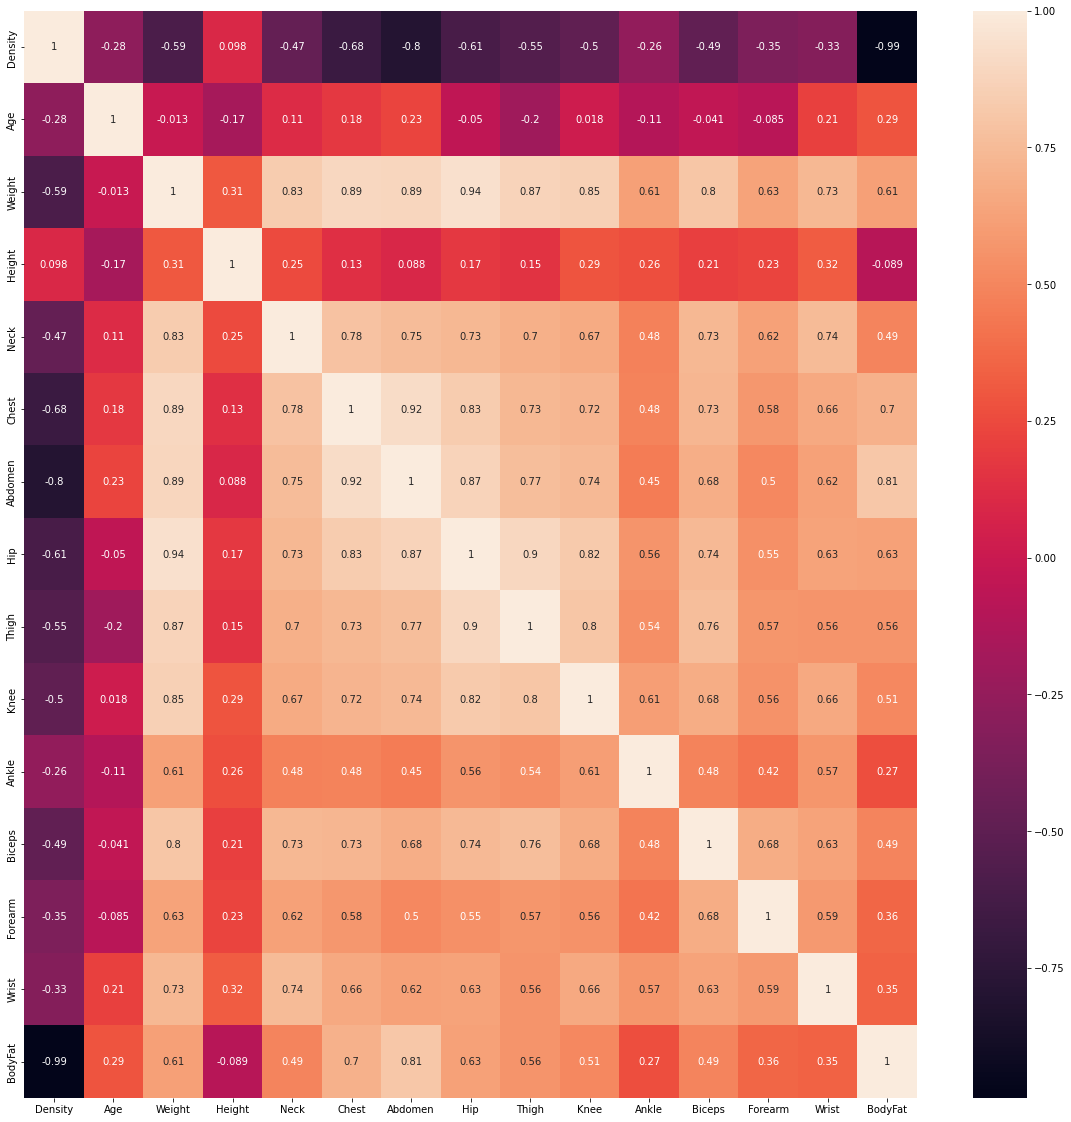

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [100]:
df_numeric=df[numeric]

In [101]:
df_numeric.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


### VIF

In [156]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    '''
    Take the inputs as dataframe and calculate the VIF.
    Returns Data frame with VIF value and respective column name.
    
        Parameters:
                X(Data Frame):Pandas Data Farame
        
        Returns:
                vif(Data Frame): Data frame with VIF value and respective column name.
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False))

In [157]:
calc_vif(df_numeric[df_numeric.columns[:-1]])

,variables,VIF
7,Hip,2823.599196
0,Density,2710.196700
13,Wrist,1339.993165
5,Chest,1327.734644
9,Knee,1174.133421
4,Neck,1081.582064
8,Thigh,1001.990668
6,Abdomen,992.381183
2,Weight,927.258823
3,Height,582.893107


### Multi Colinearity (Another method to check)

In [104]:
def check_muticolinearity(dataframe,threshold = 0.9):
    
    '''
    Take the inputs as dataframe and threshold of correlation.
    Print the number of column and respective column names to be droped.
    
        Parameters:
                dataframe(Data Frame):Pandas Data Farame
        
        Returns:
                Print the number of column and respective column names to be droped.
    
    '''
    corr_matrix =dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    if len(to_drop)>1:
        print(f'There are {len(to_drop)} columns to remove. And they are {to_drop}')
    else:
         print(f'There are {len(to_drop)} columns to remove.')

In [105]:
check_muticolinearity(df_numeric[df_numeric.columns[:-1]])

There are 2 columns to remove. And they are ['Abdomen', 'Hip']


In [ ]:
df.drop

## EDA

In [106]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['Density',
 'BodyFat',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

In [107]:
numericdf=df_raw[numeric_new]

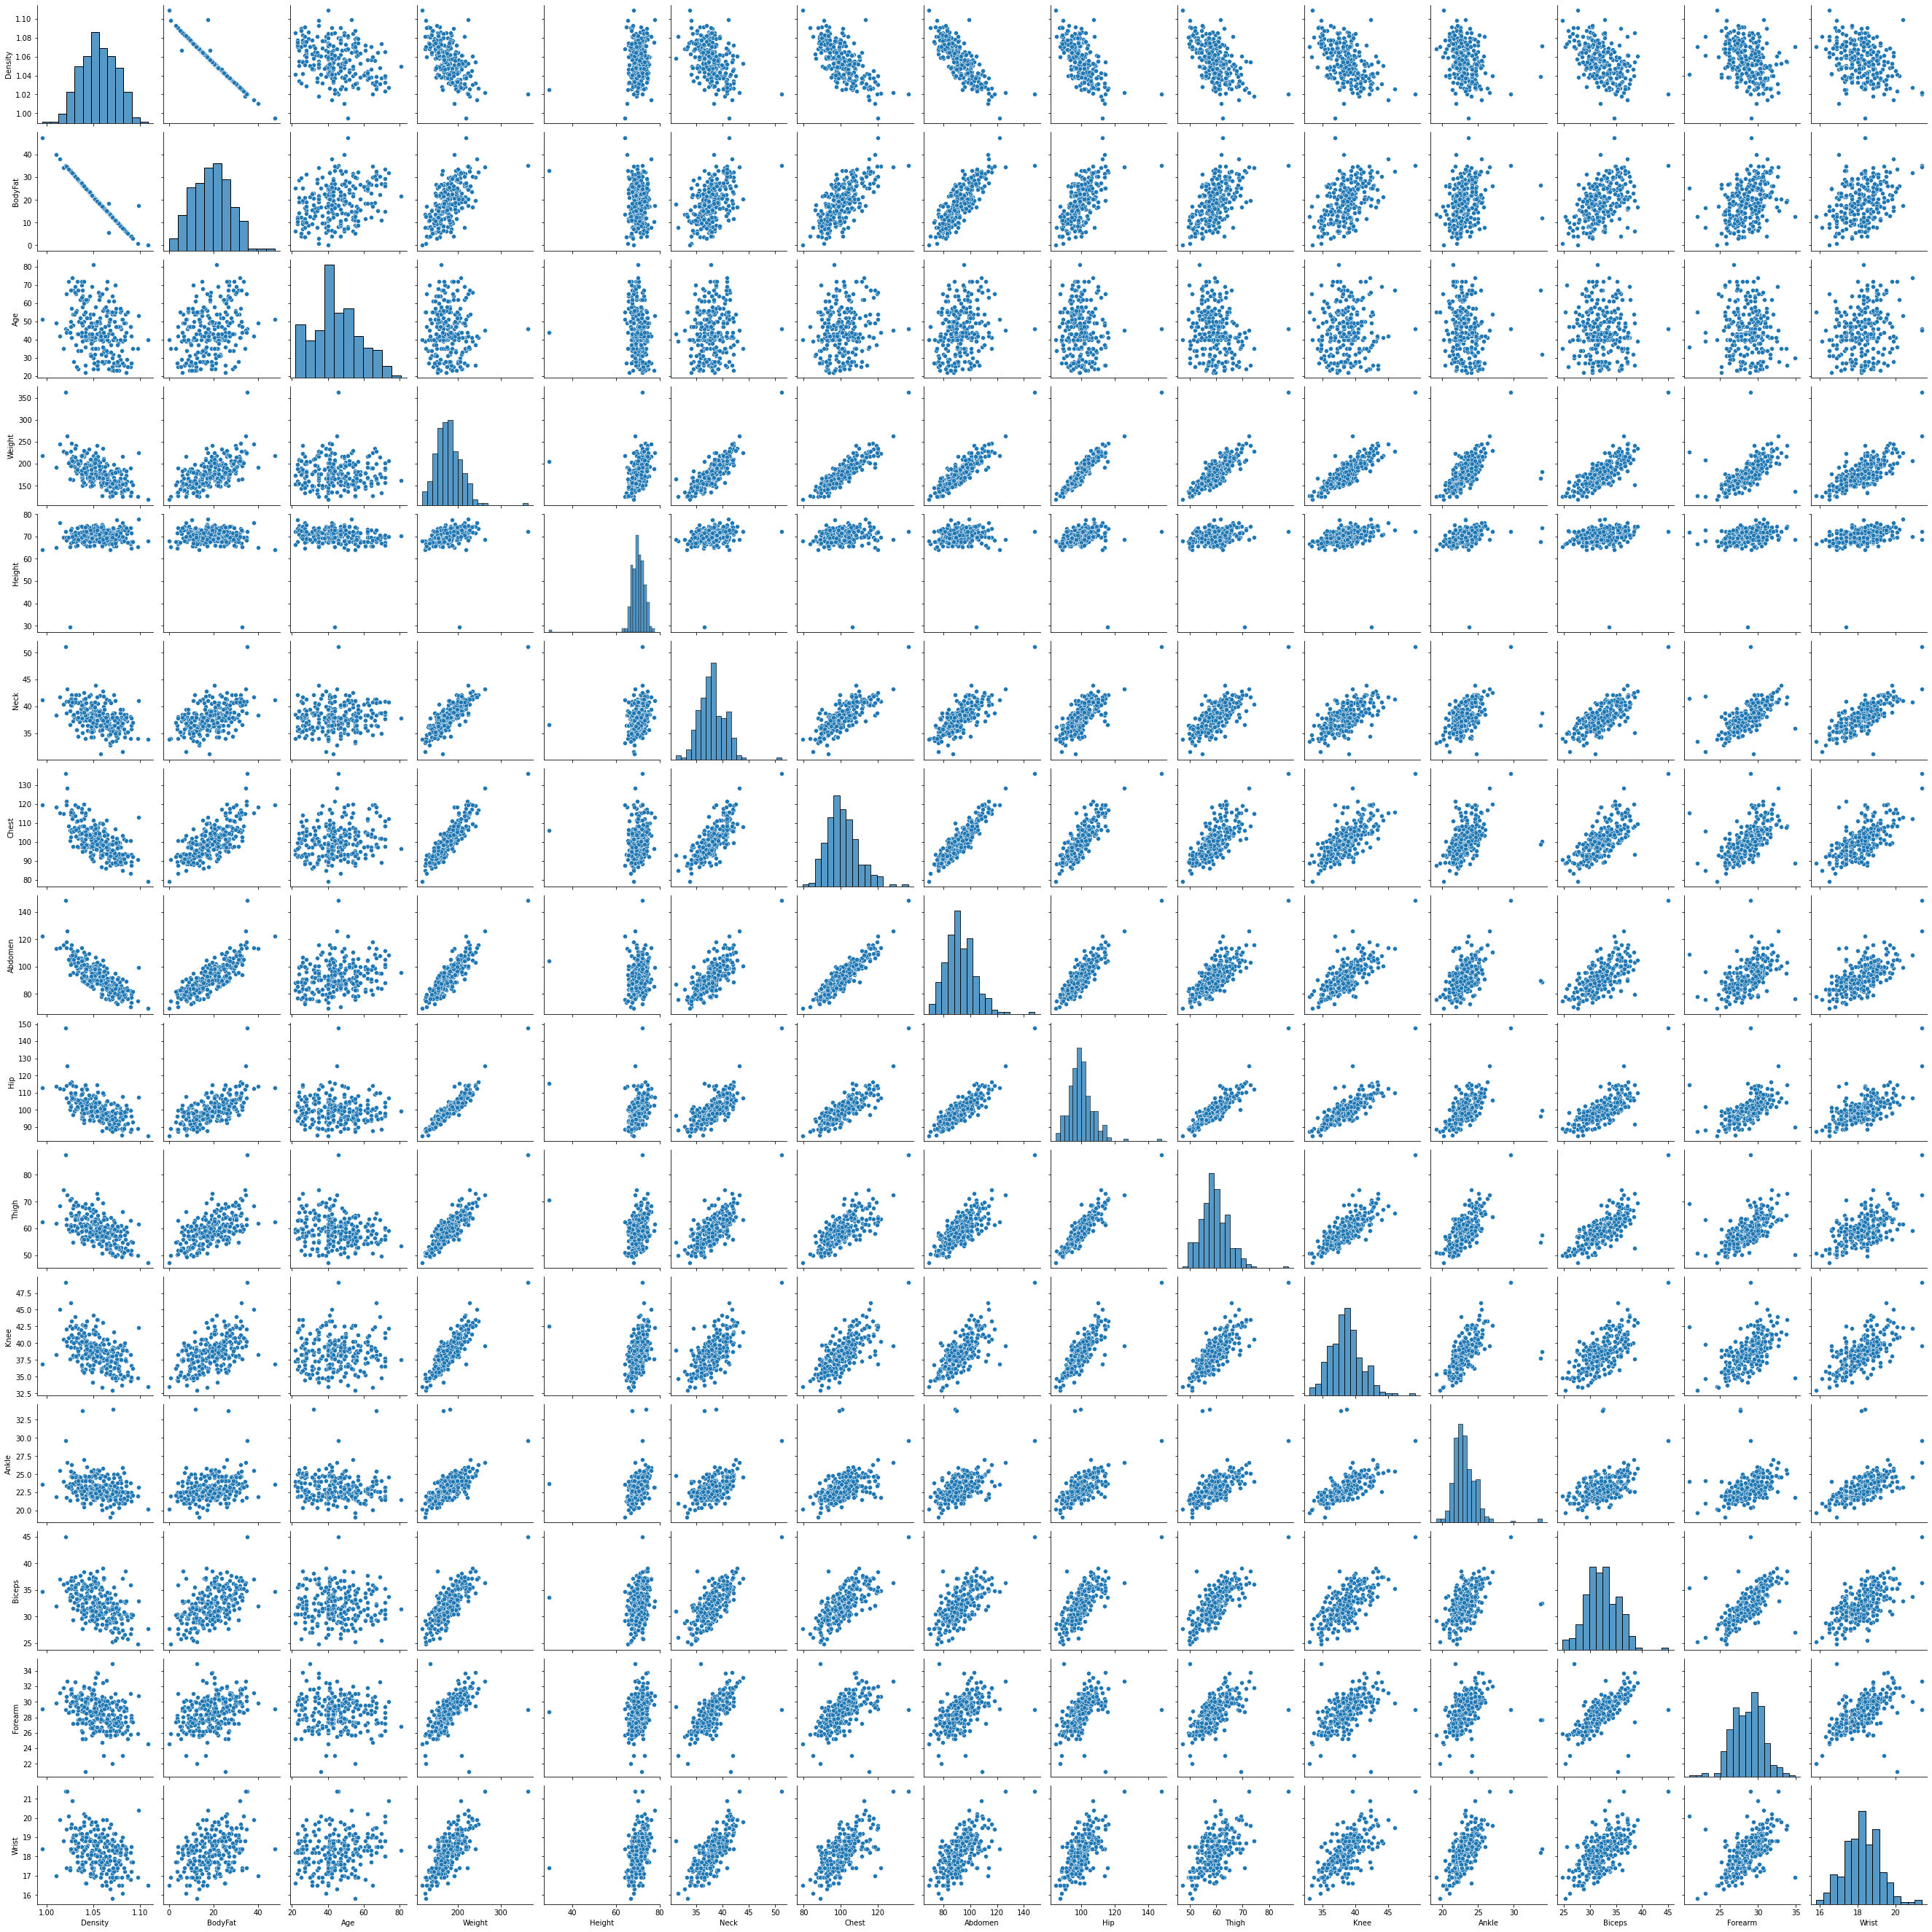

In [108]:
sns.pairplot(numericdf, markers=["o", "s", "D"])

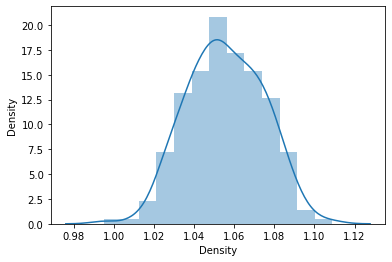

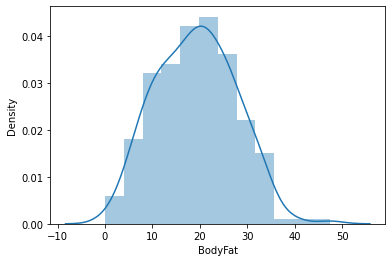

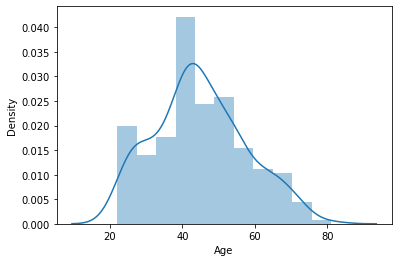

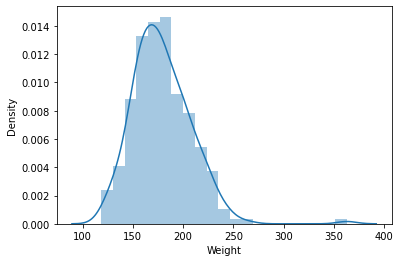

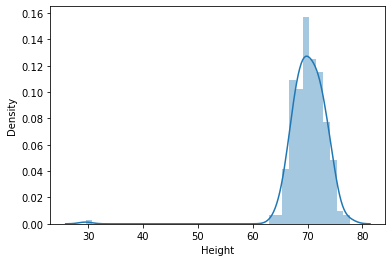

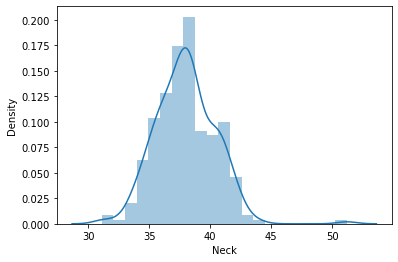

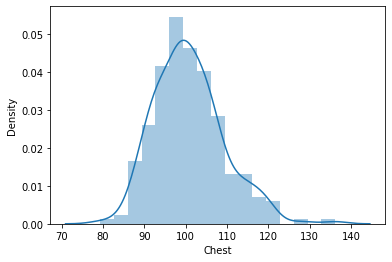

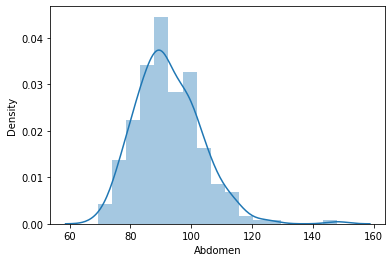

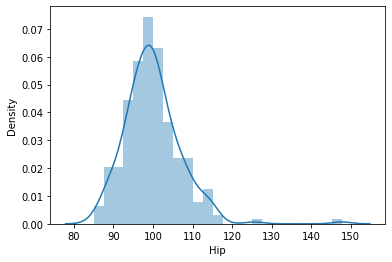

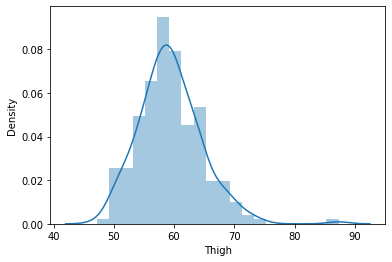

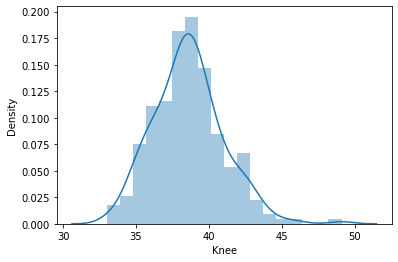

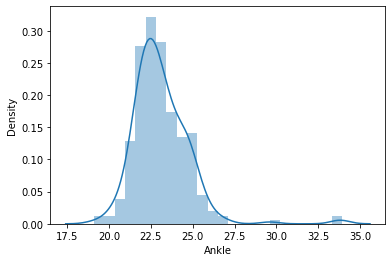

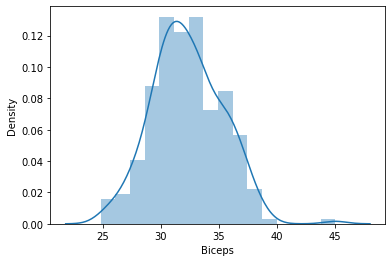

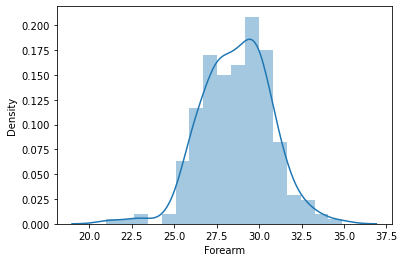

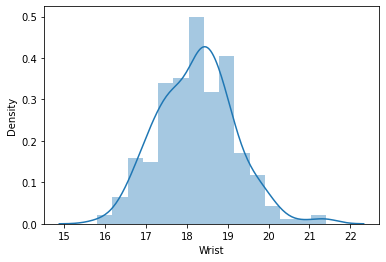

In [109]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

In [116]:
def plotdistplot(column):
    sns.distplot(df['BodyFat'],color='magenta',label='Body Fat',hist=False)
    sns.distplot(df[column],color='red',label=column,hist=False)
    plt.legend()
    plt.show()    

In [117]:
clm=list(numericdf.columns)

Distribution plot of Density with Body Fat


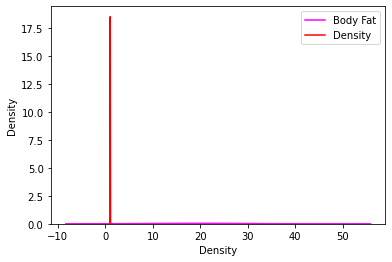

____________________________________________________________________________________________________ 

Distribution plot of BodyFat with Body Fat


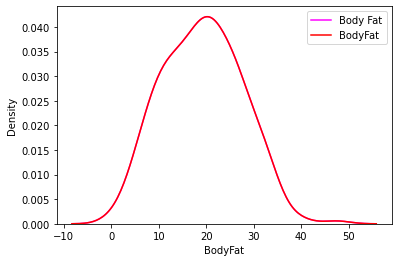

____________________________________________________________________________________________________ 

Distribution plot of Age with Body Fat


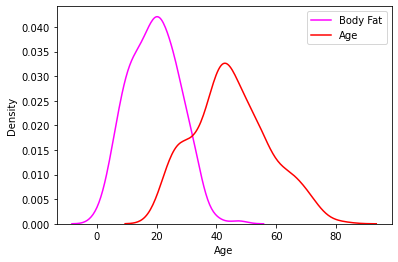

____________________________________________________________________________________________________ 

Distribution plot of Weight with Body Fat


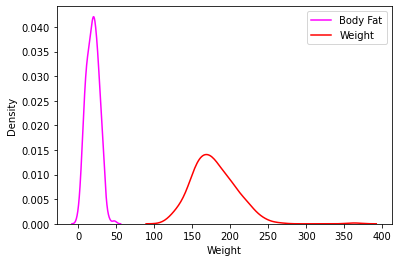

____________________________________________________________________________________________________ 

Distribution plot of Height with Body Fat


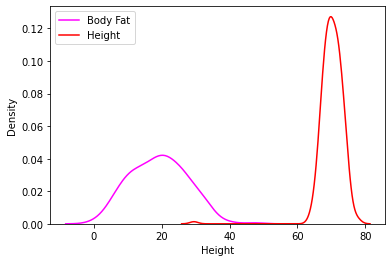

____________________________________________________________________________________________________ 

Distribution plot of Neck with Body Fat


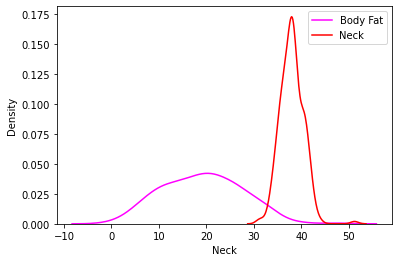

____________________________________________________________________________________________________ 

Distribution plot of Chest with Body Fat


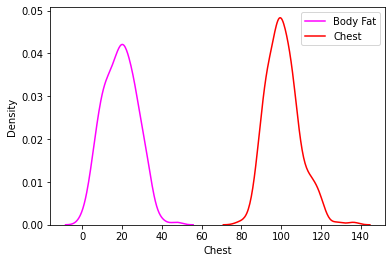

____________________________________________________________________________________________________ 

Distribution plot of Abdomen with Body Fat


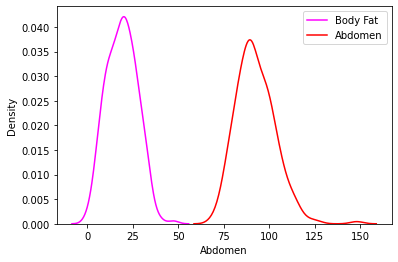

____________________________________________________________________________________________________ 

Distribution plot of Hip with Body Fat


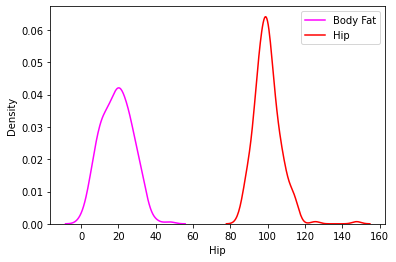

____________________________________________________________________________________________________ 

Distribution plot of Thigh with Body Fat


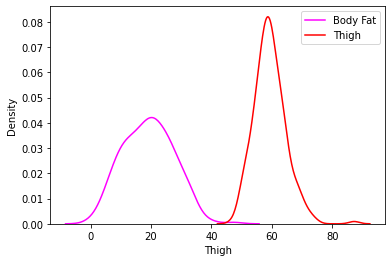

____________________________________________________________________________________________________ 

Distribution plot of Knee with Body Fat


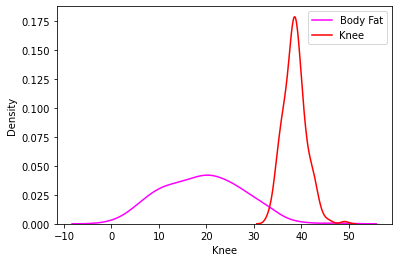

____________________________________________________________________________________________________ 

Distribution plot of Ankle with Body Fat


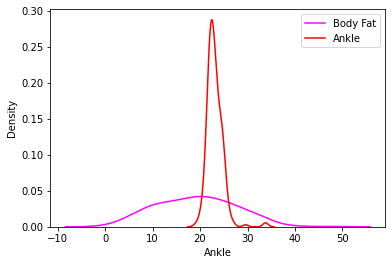

____________________________________________________________________________________________________ 

Distribution plot of Biceps with Body Fat


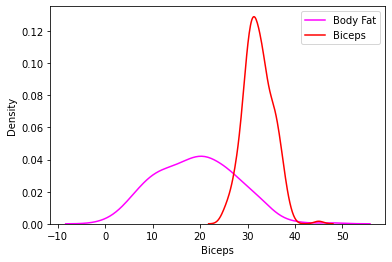

____________________________________________________________________________________________________ 

Distribution plot of Forearm with Body Fat


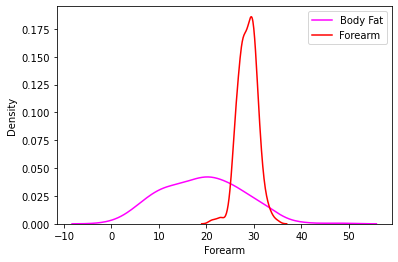

____________________________________________________________________________________________________ 

Distribution plot of Wrist with Body Fat


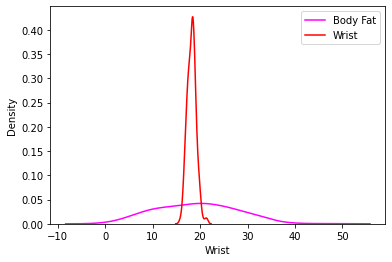

____________________________________________________________________________________________________ 



In [122]:
for i in numericdf.columns:
    print(f'Distribution plot of {i} with Body Fat')
    plotdistplot(i)
    print('_'*100,'\n')
    plt.show()

In [123]:
def plotdistplot_hist(column):
    sns.distplot(df['BodyFat'],color='magenta',label='Body Fat',hist=True)
    sns.distplot(df[column],color='red',label=column,hist=True)
    plt.legend()
    plt.show()  

Distribution plot of Density with Body Fat


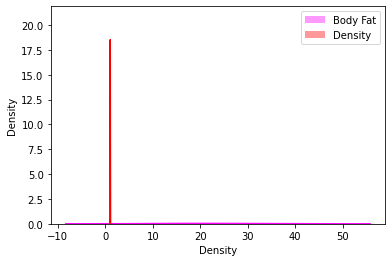

____________________________________________________________________________________________________ 

Distribution plot of BodyFat with Body Fat


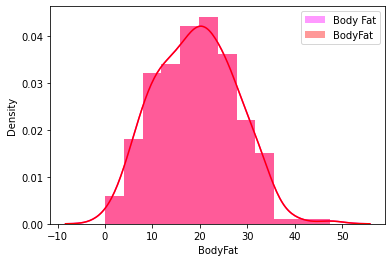

____________________________________________________________________________________________________ 

Distribution plot of Age with Body Fat


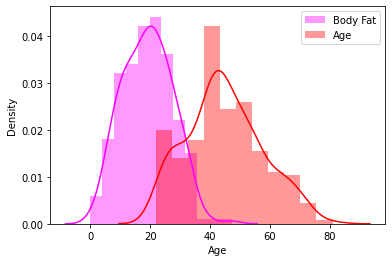

____________________________________________________________________________________________________ 

Distribution plot of Weight with Body Fat


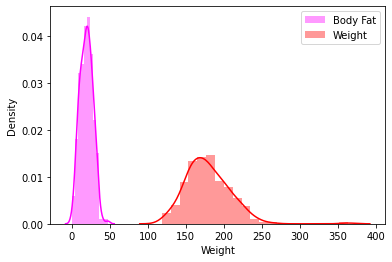

____________________________________________________________________________________________________ 

Distribution plot of Height with Body Fat


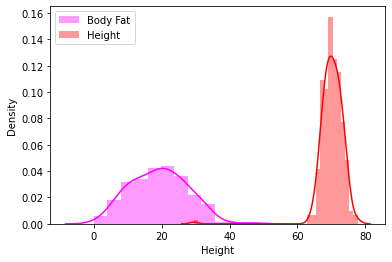

____________________________________________________________________________________________________ 

Distribution plot of Neck with Body Fat


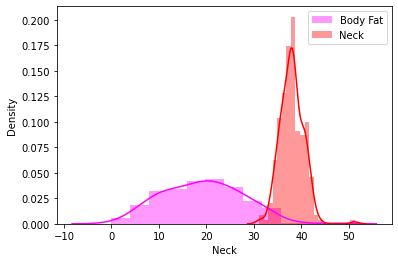

____________________________________________________________________________________________________ 

Distribution plot of Chest with Body Fat


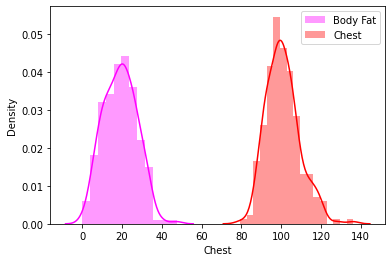

____________________________________________________________________________________________________ 

Distribution plot of Abdomen with Body Fat


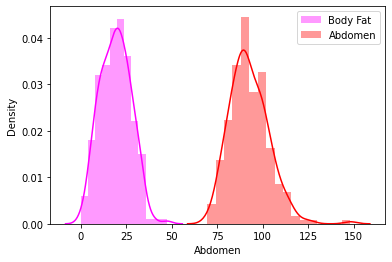

____________________________________________________________________________________________________ 

Distribution plot of Hip with Body Fat


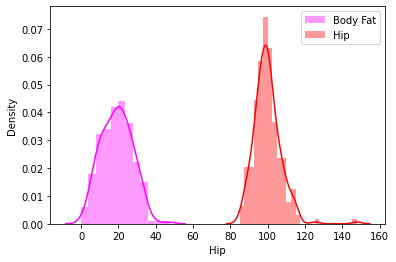

____________________________________________________________________________________________________ 

Distribution plot of Thigh with Body Fat


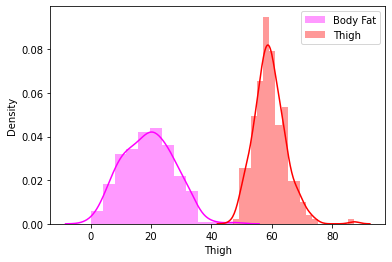

____________________________________________________________________________________________________ 

Distribution plot of Knee with Body Fat


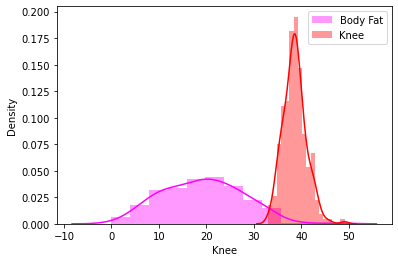

____________________________________________________________________________________________________ 

Distribution plot of Ankle with Body Fat


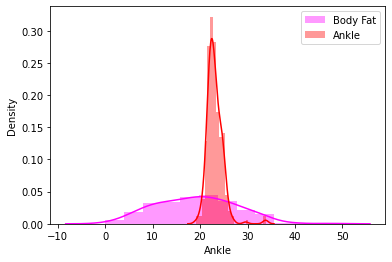

____________________________________________________________________________________________________ 

Distribution plot of Biceps with Body Fat


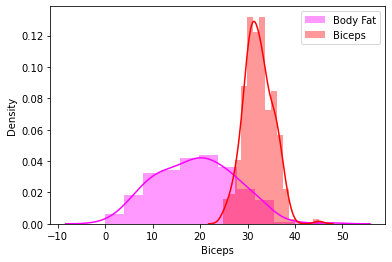

____________________________________________________________________________________________________ 

Distribution plot of Forearm with Body Fat


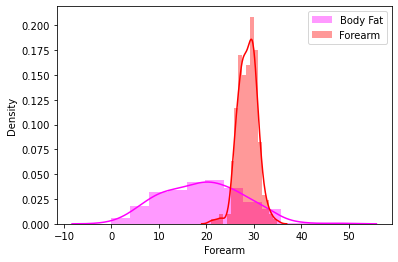

____________________________________________________________________________________________________ 

Distribution plot of Wrist with Body Fat


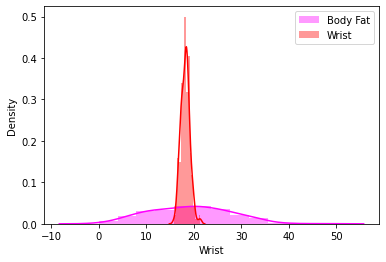

____________________________________________________________________________________________________ 



In [124]:
for i in numericdf.columns:
    print(f'Distribution plot of {i} with Body Fat')
    plotdistplot_hist(i)
    print('_'*100,'\n')
    plt.show()

In [135]:
from scipy import stats

In [144]:
def probaplot(col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='red')
    
    plt.show()

Prob Plot of Density


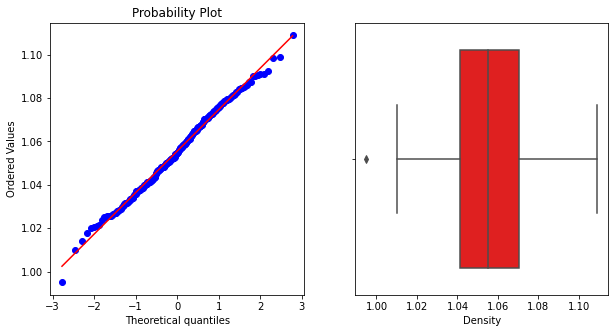

____________________________________________________________________________________________________ 

Prob Plot of BodyFat


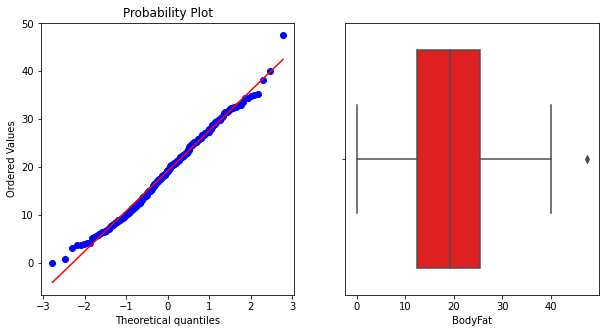

____________________________________________________________________________________________________ 

Prob Plot of Age


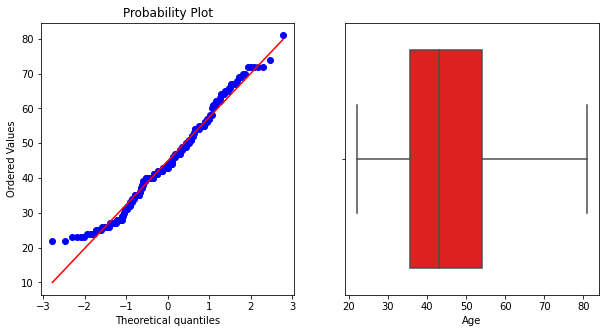

____________________________________________________________________________________________________ 

Prob Plot of Weight


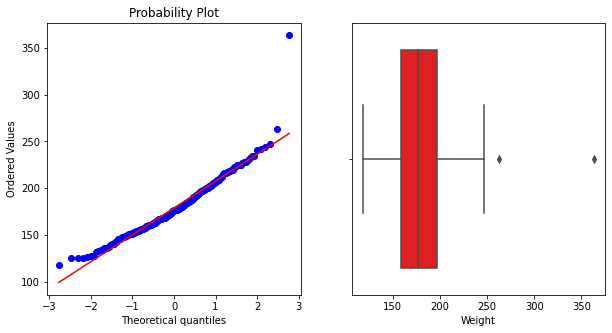

____________________________________________________________________________________________________ 

Prob Plot of Height


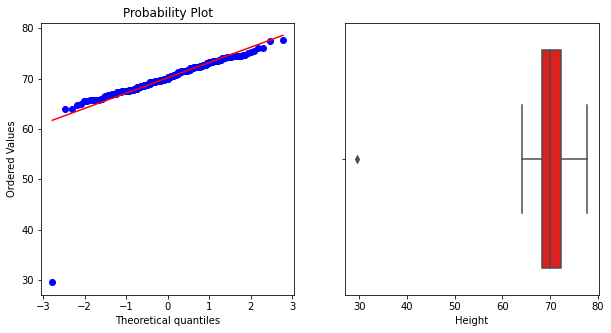

____________________________________________________________________________________________________ 

Prob Plot of Neck


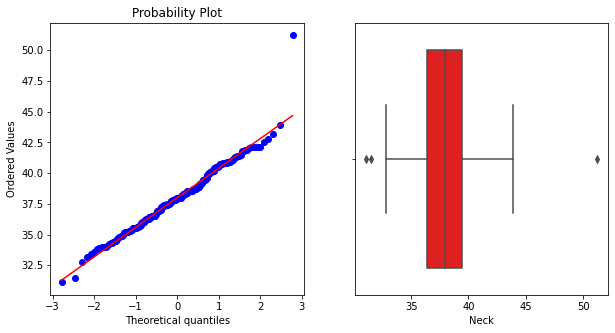

____________________________________________________________________________________________________ 

Prob Plot of Chest


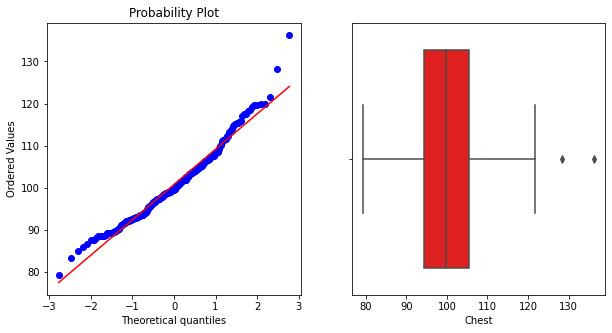

____________________________________________________________________________________________________ 

Prob Plot of Abdomen


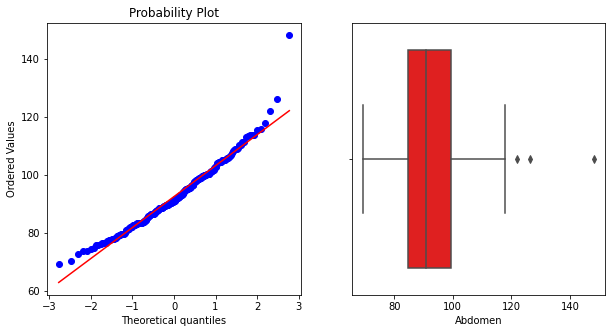

____________________________________________________________________________________________________ 

Prob Plot of Hip


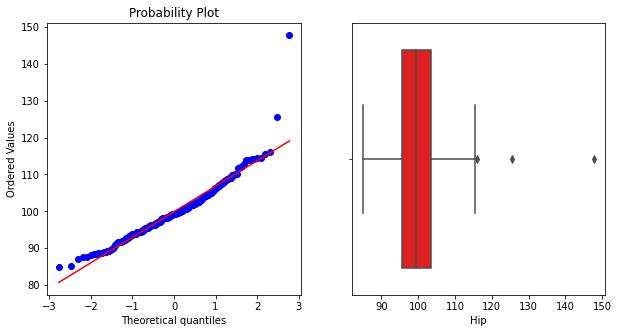

____________________________________________________________________________________________________ 

Prob Plot of Thigh


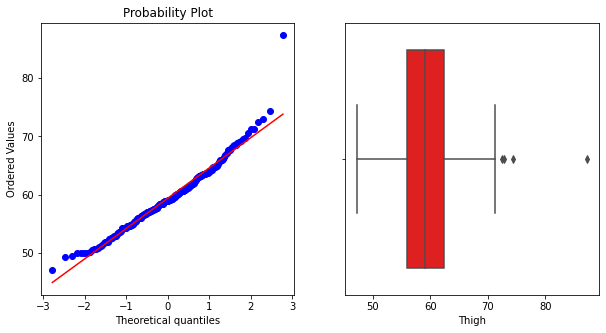

____________________________________________________________________________________________________ 

Prob Plot of Knee


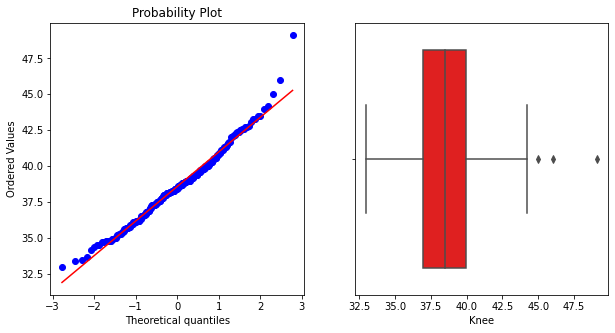

____________________________________________________________________________________________________ 

Prob Plot of Ankle


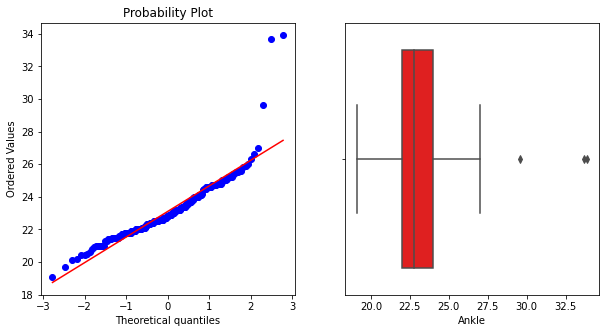

____________________________________________________________________________________________________ 

Prob Plot of Biceps


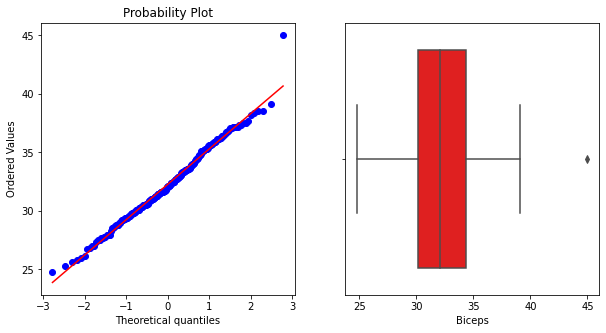

____________________________________________________________________________________________________ 

Prob Plot of Forearm


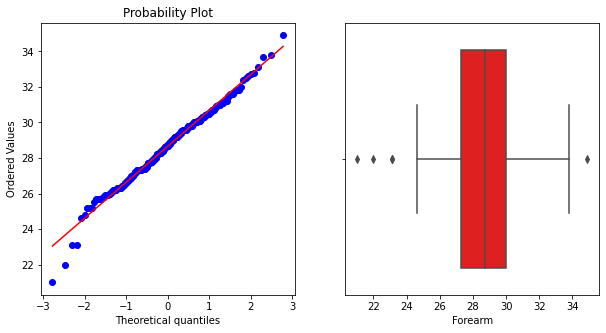

____________________________________________________________________________________________________ 

Prob Plot of Wrist


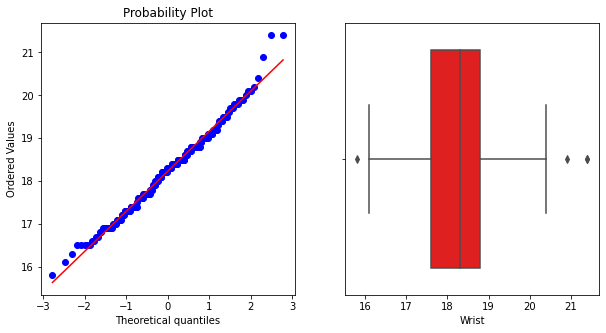

____________________________________________________________________________________________________ 



In [145]:
for i in numericdf.columns:
    print(f'Prob Plot of {i}')
    probaplot(i)
    print('_'*100,'\n')
    plt.show()

## Outlier

In [146]:
from scipy import stats

In [149]:
df.shape

(252, 15)

In [148]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [151]:
df_new.shape

(242, 15)

In [158]:
X=df.drop('BodyFat',axis=1)
y=df['BodyFat']

## Train Test Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
X_train.columns

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

## Saving Data in Pickle

In [162]:
X_train.to_pickle("./X_train.pkl")
X_test.to_pickle("./X_test.pkl")
y_train.to_pickle("./y_train.pkl")
y_test.to_pickle("./y_test.pkl")

X.to_pickle("./X.pkl")
y.to_pickle("./y.pkl")
df.to_pickle("./df.pkl")